Ch04 Getting started with neural networks: Classification and regression

電影評論二分法
Classifying movie reviews: A binary classification example

In [ ]:
# import the IMDB dataset
# num_words=10000 #只保留訓練數據中出現頻率最高的10000個單詞

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0]

1

In [ ]:
train_labels.shape

(25000,)

In [ ]:
# 10000 words
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text
將評論解碼回文本

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


# Preparing the data

不能直接將整數列表輸入神經網路，他們都有不同的長度，但神經網路希望處理連續批次的數據。你必須把你的列表變成張量。
解決方案:
1.填充列表，使他們都具有相同的長度(後面章節會介紹)
2.multi-hot encoding，將它們轉換成0和1的向量
ex:[8,5]，除了索引8和5之外，該向量全為0。

In [17]:
# multi-hot encoding
#turn text to 0,1
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [40]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [41]:
y_train[0]

3.0

Building your model建立模型

In [20]:
#relu : 將負值歸0
#sigmoid : 將任意值擠壓到[0,1]區間
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model 編譯模型

In [21]:
model.compile(optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"])

Validating your approach 驗證你的方法

In [23]:
#從訓練數據中分離10000筆資料來創建一個驗證集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model 訓練模型

In [24]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.4959 - accuracy: 0.7904 - val_loss: 0.3841 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2949 - accuracy: 0.9045 - val_loss: 0.3008 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2178 - accuracy: 0.9303 - val_loss: 0.2776 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1729 - accuracy: 0.9454 - val_loss: 0.2747 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1436 - accuracy: 0.9540 - val_loss: 0.2818 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1204 - accuracy: 0.9621 - val_loss: 0.3026 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0981 - accuracy: 0.9713 - val_loss: 0.3070 - val_accuracy: 0.8846
Epoch 8/20
30

In [25]:
#顯示存入的資料
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss
繪製訓練和驗證損失

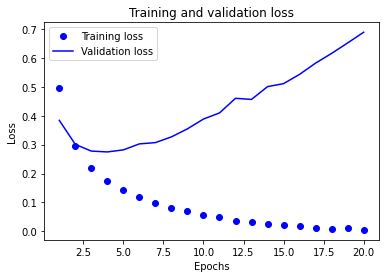

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 在大約第4個epoch之後，對於訓練數據進行了過度優化，產生"過度擬合"。
#可以在4個epoch之後停止訓練

Plotting the training and validation accuracy
繪製訓練和驗證正確率

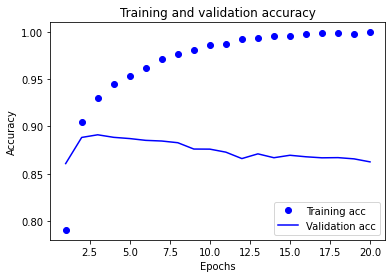

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 重新訓練模型

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.5042 - accuracy: 0.7976
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2935 - accuracy: 0.9061
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2191 - accuracy: 0.9252
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3014 - accuracy: 0.8804


In [29]:
results
#loss, accuracy

[0.3014112114906311, 0.8804399967193604]

# 使用經過訓練的模型對新數據進行預測

In [30]:
model.predict(x_test)

array([[0.14873534],
       [0.9941025 ],
       [0.6128934 ],
       ...,
       [0.06944829],
       [0.06218076],
       [0.45913276]], dtype=float32)

# 進一步實驗改良

1.嘗試使用1~3層隱藏層
看看會如何影響驗證和測試
2.嘗試使用更多或更少的神經元:32、64...。
3.嘗試使用MSE損失函數
4.嘗試使用tanh active function

# 總結

1.通常需要對原始數據進行預處理，以便能將其作為張量輸出到神經網路
單詞序列可以編碼為二進制向量，但也有其他編碼方式。
2.帶有relu的隱藏層可以解決廣泛的問題，可能會經常使用到。
3.在二元分類問題，模型應該以具有一個單元和sigmoid激活函數的Dense層結束
模型的輸出應該是0~1之間的標量，編碼概率。
4.在二元分類問題上使用sigmoid輸出，應該使用的損失函數是binary_crossentropy。

# 新聞專線分類:多種分類示例

In [31]:
#Loading the Reuters dataset使用路透社資料集
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [32]:
len(train_data)

8982

In [35]:
train_data.shape

(8982,)

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decoding newswires back to text
將新聞專線解碼回文本

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [37]:
train_labels[10]

3

# Preparing the data 準備資料

In [49]:
# multi-hot encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [54]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [50]:
#one-hot encoding
#method 1
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [51]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
#one-hot encoding
#method 2
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [53]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Building your model 建立模型

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# Compiling the model 編譯模型

In [56]:
#這邊因為是多種分類所以使用loss="categorical_crossentropy"
model.compile(optimizer="rmsprop",
      loss="categorical_crossentropy",
      metrics=["accuracy"])

# Validating your approach 驗證方法

## 建立驗證集

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 測試模型

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 109ms/step - loss: 2.5545 - accuracy: 0.4932 - val_loss: 1.7114 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.4015 - accuracy: 0.7175 - val_loss: 1.2822 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0228 - accuracy: 0.7932 - val_loss: 1.1197 - val_accuracy: 0.7770
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.7955 - accuracy: 0.8436 - val_loss: 1.0154 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6294 - accuracy: 0.8732 - val_loss: 0.9642 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4982 - accuracy: 0.8986 - val_loss: 0.9314 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4023 - accuracy: 0.9176 - val_loss: 0.9009 - val_accuracy: 0.8160
Epoch 8/20
1

## 繪製訓練和驗證損失

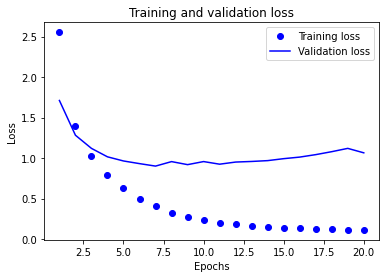

In [59]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 繪製訓練和驗證正確率

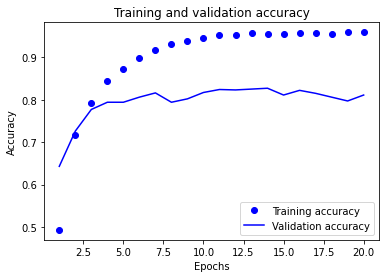

In [60]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 大約在7個epoch之後開始過度擬合

# 重新訓練

In [61]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=7,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
18/18 [==============================] - 2s 76ms/step - loss: 2.4510 - accuracy: 0.5511
Epoch 2/7
18/18 [==============================] - 1s 55ms/step - loss: 1.3376 - accuracy: 0.7132
Epoch 3/7
18/18 [==============================] - 1s 55ms/step - loss: 0.9979 - accuracy: 0.7829
Epoch 4/7
18/18 [==============================] - 1s 69ms/step - loss: 0.7829 - accuracy: 0.8327
Epoch 5/7
18/18 [==============================] - 1s 49ms/step - loss: 0.6152 - accuracy: 0.8703
Epoch 6/7
18/18 [==============================] - 1s 69ms/step - loss: 0.4880 - accuracy: 0.9014
Epoch 7/7
71/71 [==============================] - 0s 4ms/step - loss: 0.9474 - accuracy: 0.7921


In [62]:
results

[0.9473869204521179, 0.7920747995376587]

# 大約達到了80%的準確率。

對於二元分類問題，純隨機分類器的準確率達到50%
再下面，我們快速建立一個來檢查我們的模型

In [64]:
#純隨機分類器
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19412288512911843

隨機分類器的分類準確率約為19%，因此模型的結果看起來相當不錯

# # 對新數據進行預測

In [65]:
predictions = model.predict(x_test)

In [66]:
# 共46類
predictions[0].shape

(46,)

In [67]:
#係數總合約為1
np.sum(predictions[0])

1.0000001

In [69]:
#概率最高的類別
np.argmax(predictions[0])

4

# Extra: 處理標籤和損失的不同方法

前面提到，另一種編碼方法是將他們轉換為整數張量

In [70]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

這種方法唯一改變的是損失函數
loss='sparse_categorical_crossentropy'

In [71]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 擁有足夠大的中間層的重要性

因為最終輸出是46維，所以應該避免使用少於46個神經元的中間層。
下面讓我們看看加入一層小於46維的中間層造成的影響。

In [72]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9803 - accuracy: 0.2210 - val_loss: 2.1373 - val_accuracy: 0.5930
Epoch 2/20
63/63 [==============================] - 2s 32ms/step - loss: 1.7091 - accuracy: 0.6059 - val_loss: 1.5661 - val_accuracy: 0.6390
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.3569 - accuracy: 0.6671 - val_loss: 1.4523 - val_accuracy: 0.6520
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1774 - accuracy: 0.6904 - val_loss: 1.3834 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.0373 - accuracy: 0.7169 - val_loss: 1.3148 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9267 - accuracy: 0.7499 - val_loss: 1.2726 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8370 - accuracy: 0.7745 - val_loss: 1.2640 - val_accuracy: 0.7100
Epoch 8/20
63

可以發現準確率達到71%，大約下降了8%，主要是因為我們試圖將大量信息壓縮到一個太低維的空間中。

# 總結

1.如果你常是在N個類別中對數據進行分類，你的模型應該以大小為N的Dense層結束
2.在單標籤、多種分類問題中，你的模型應該以softmax激活函數結束，以便輸出N個輸出類的概率分布
3.crossentropy總是應該用於此類問題的損失函數。它使模型輸出的概率分布與目標的真實分布之間的距離最小化
4.多種分類中有兩種處理標籤的方法:1.通過分類編碼(one-hot encoding)對標籤進行編碼，並使用categorical_crossentropy作為損失函數。2.將標籤編碼為整數並使用sparse_categorical_crossentropy。
5.如果需要將數據分類為大量分類，應避免中間層太小。

# 預測房價:回歸示例

In [77]:
# The Boston Housing Price dataset 波士頓房價數據集
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [78]:
train_data.shape

(404, 13)

In [79]:
test_data.shape

(102, 13)

In [80]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# Preparing the data 資料預處理

In [82]:
#標準化
#減去特徵的均值並除以標準差，使得特徵以0為中心，具有單位標準差。
# !!!:用於標準化test_data的數據是使用訓練數據計算的，
#   你永遠不應該在工作流程中使用根據測試數據計算的任何數據，
#   即使是像數據標準化這樣簡單的事情
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# 建構模型

In [83]:
#模型以1個神經元結束，沒有激活函數，它將是一個線性層
#這是純量回歸的典型設置
#如果你在最後設置了激活函數，會限制輸出的範圍
#如果你將sigmoid設置在最後一層，那模型只能學習預測0~1的值
#而這裡，因為最後一層是純線性的，因此模型可以自由學習預測任何範圍
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model
#mse:均方誤差，預測與目標之間差異的平方，這是回歸問題中廣泛使用的損失函數。
#mae:平均絕對誤差，預測和目標之間差異的絕對值

# 使用K-fold驗證

因為我們的數據太少，驗證集最終會非常小。
因此驗證數據和訓練數據的準確率會有很大的差異
這會阻止我們有效的評估模型
在這種情況下最適合使用K-fold交叉驗證

In [84]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [85]:
all_scores

[1.9654229879379272, 2.7066123485565186, 2.3081233501434326, 2.637432813644409]

In [86]:
np.mean(all_scores)

2.404397875070572

# 嘗試更長時間地訓練模型:500epoch

為了記錄模型在每個epoch的表現，現在修改訓練循環以保存每個fold的每個epoch的驗證分數

In [87]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


# Building the history of successive mean K-fold validation scores 建構連續平均K-fold驗證分數的歷史

In [88]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

繪圖

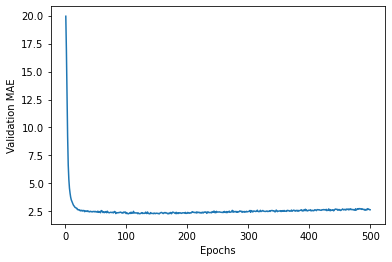

In [89]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

由於前10個的驗證份數過高
所以現在忽略前十筆資料再繪圖

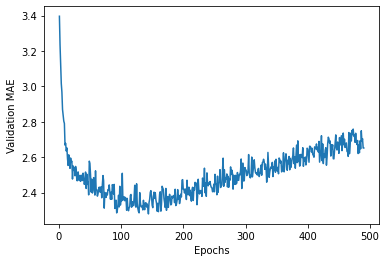

In [90]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 訓練最終模型

In [94]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.9460 - mae: 2.7386


In [95]:
test_mae_score

2.7385969161987305

# 對新數據進行預測

In [96]:
#單位為千美元，所以這邊結果為8996美元
predictions = model.predict(test_data)
predictions[0]

array([8.996703], dtype=float32)

# 總結

1.回歸使用不同於用於分類的損失函數，均方誤差(MSE)是一種常用於回歸的損失函數。
2.同理，用於回歸的評估指標和分類不同，準確性的概念不適用於回歸。一種常見的回歸指標是平均絕對誤差(MAE)
3.當輸入數據的特徵具有不同範圍時，每個特徵都應作為預處理步驟獨立縮放
4.當可用數據很少時，使用K-fold驗證是可靠評估的好方法
5.當可用訓練數據很少時，最好使用中間層很少(通常只有一兩個)的小型模型，以避免嚴重的過度擬合。
